<a href="https://colab.research.google.com/github/Reemabdi/fashion-mnist-cnn/blob/main/Fashion_MNIST_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
val_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


100%|██████████| 26.4M/26.4M [00:01<00:00, 13.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 228kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.78MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.0MB/s]


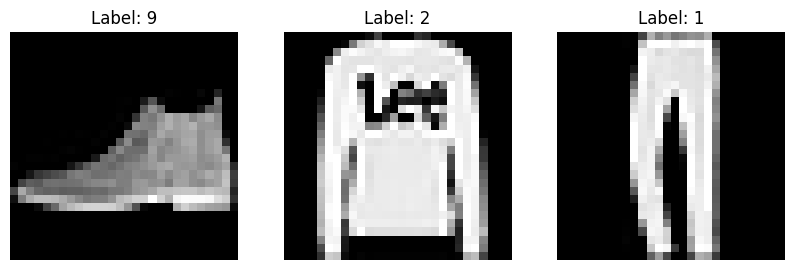

In [ ]:
def show_data(dataset):
    figure = plt.figure(figsize=(10, 4))
    for i in range(3):
        img, label = dataset[i]
        figure.add_subplot(1, 3, i+1)
        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(f"Label: {label}")
        plt.axis("off")
    plt.show()

show_data(val_dataset)


In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*7*7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNModel()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
epochs = 10
train_losses = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss/len(train_loader))

    # Validation Accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    val_accuracies.append(accuracy)
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Val Accuracy: {accuracy:.2f}%")


Epoch 1, Loss: 0.4270, Val Accuracy: 87.98%
Epoch 2, Loss: 0.2741, Val Accuracy: 89.76%
Epoch 3, Loss: 0.2317, Val Accuracy: 90.84%
Epoch 4, Loss: 0.1983, Val Accuracy: 90.90%
Epoch 5, Loss: 0.1742, Val Accuracy: 90.28%
Epoch 6, Loss: 0.1517, Val Accuracy: 91.99%
Epoch 7, Loss: 0.1305, Val Accuracy: 91.49%
Epoch 8, Loss: 0.1102, Val Accuracy: 91.37%
Epoch 9, Loss: 0.0946, Val Accuracy: 91.94%
Epoch 10, Loss: 0.0773, Val Accuracy: 91.44%


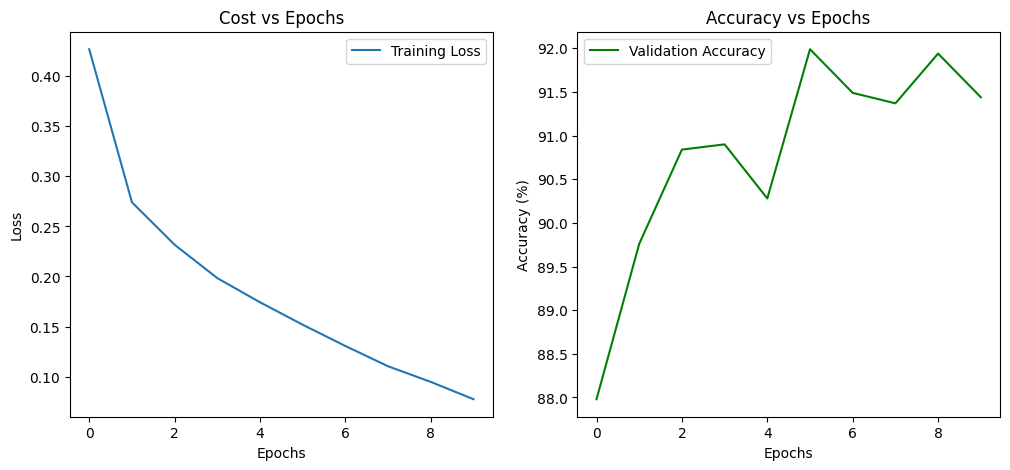

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.title('Cost vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()
